# Data Preprocessing

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Обработка выбросов

In [24]:
df = pd.read_csv('./Data/pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


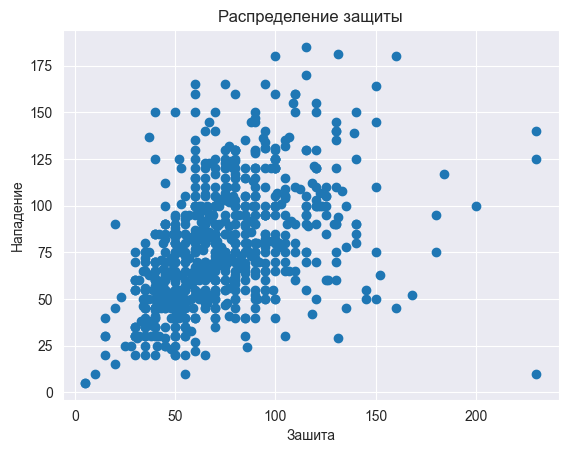

In [25]:
plt.title('Распределение защиты')
plt.xlabel('Зашита')
plt.ylabel('Нападение')
plt.scatter(df.defense, df.attack);

## Правило трех сигм

In [27]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [37]:
df.defense_z = (df.defense - df.defense.mean()) / df.defense.std()
df.defense_z

0     -0.780286
1     -0.325285
2      1.624720
3     -0.975286
4     -0.487785
         ...   
796    0.974718
797    1.884720
798   -0.650286
799    0.909718
800    1.364719
Name: defense, Length: 801, dtype: float64

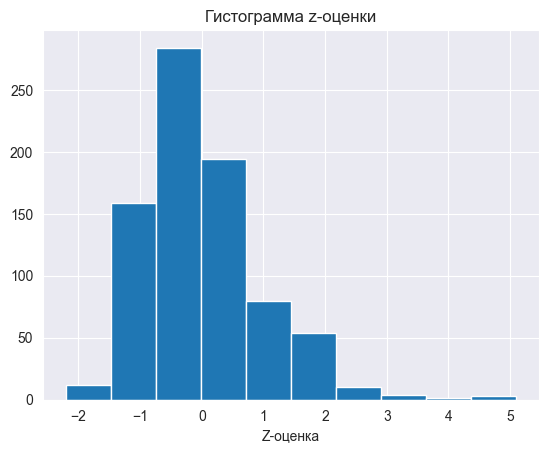

In [38]:
plt.title('Гистограмма z-оценки')
plt.xlabel('Z-оценка')
plt.hist(df.defense_z);

In [39]:
df[df.defense_z > 3]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
79,"['Oblivious', 'Own Tempo', 'Regenerator']",2.0,2.0,1.0,2.0,1.0,0.5,0.5,1.00,2.0,...,50.0,80,130,80,30,water,psychic,78.5,1,0
90,"['Shell Armor', 'Skill Link', 'Overcoat']",1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.00,1.0,...,50.0,91,85,45,70,water,ice,132.5,1,0
207,"['Rock Head', 'Sturdy', 'Sheer Force']",0.5,1.0,0.5,0.0,0.5,2.0,2.0,0.50,1.0,...,50.0,208,55,95,30,steel,ground,400.0,2,0
212,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,...,50.0,213,10,230,5,bug,rock,20.5,2,0
305,"['Sturdy', 'Rock Head', 'Heavy Metal']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,50.0,306,60,80,50,steel,rock,360.0,3,0
376,"['Clear Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.50,1.0,...,NaN,377,50,100,50,rock,NaN,230.0,3,1
410,"['Sturdy', 'Soundproof']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,88.1,411,47,138,30,rock,steel,149.5,4,0
712,"['Own Tempo', 'Ice Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.00,1.0,...,50.0,713,44,46,28,ice,NaN,505.0,6,0


In [40]:
df_new = df[df.defense_z > 3]
df_new

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
79,"['Oblivious', 'Own Tempo', 'Regenerator']",2.0,2.0,1.0,2.0,1.0,0.5,0.5,1.00,2.0,...,50.0,80,130,80,30,water,psychic,78.5,1,0
90,"['Shell Armor', 'Skill Link', 'Overcoat']",1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.00,1.0,...,50.0,91,85,45,70,water,ice,132.5,1,0
207,"['Rock Head', 'Sturdy', 'Sheer Force']",0.5,1.0,0.5,0.0,0.5,2.0,2.0,0.50,1.0,...,50.0,208,55,95,30,steel,ground,400.0,2,0
212,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,...,50.0,213,10,230,5,bug,rock,20.5,2,0
305,"['Sturdy', 'Rock Head', 'Heavy Metal']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,50.0,306,60,80,50,steel,rock,360.0,3,0
376,"['Clear Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.50,1.0,...,NaN,377,50,100,50,rock,NaN,230.0,3,1
410,"['Sturdy', 'Soundproof']",0.5,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,...,88.1,411,47,138,30,rock,steel,149.5,4,0
712,"['Own Tempo', 'Ice Body', 'Sturdy']",1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.00,1.0,...,50.0,713,44,46,28,ice,NaN,505.0,6,0


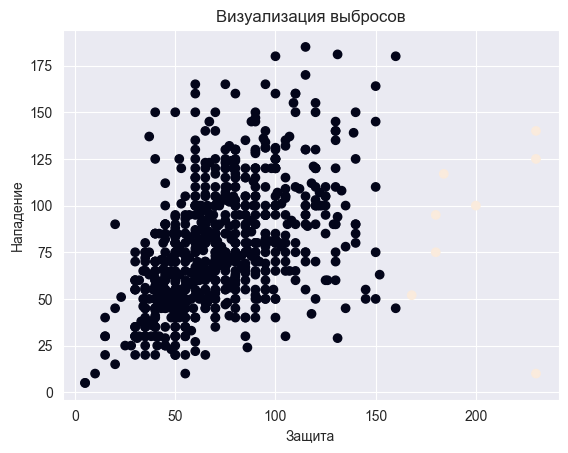

In [42]:
plt.title('Визуализация выбросов')
plt.xlabel('Защита')
plt.ylabel('Нападение')
plt.scatter(df.defense, df.attack, c = df.defense_z > 3);

## Поиск выбросов на основе межквартального расстояния

In [44]:
defense = df.defense
defense 

0       49
1       63
2      123
3       43
4       58
      ... 
796    103
797    131
798     53
799    101
800    115
Name: defense, Length: 801, dtype: int64

In [45]:
defense_arr = np.array(defense)
defense_arr

array([ 49,  63, 123,  43,  58,  78,  65,  80, 120,  35,  55,  50,  30,
        50,  40,  40,  55,  80,  35,  70,  30,  65,  44,  69,  40,  50,
        90, 120,  52,  67,  87,  40,  57,  77,  48,  73,  40,  75,  20,
        45,  35,  70,  55,  70,  85,  55,  80,  50,  60,  30,  60,  35,
        60,  48,  78,  35,  60,  45,  80,  40,  65,  95,  15,  30,  65,
        50,  70,  80,  35,  50,  65,  35,  65, 100, 115, 130,  55,  70,
        65, 180,  70,  95,  55,  45,  70,  55,  80,  50,  75, 100, 180,
        30,  45,  80, 160,  45,  70,  90, 115,  50,  70,  80,  85,  95,
       110,  53,  79,  75,  95, 120,  95, 120,   5, 115, 100,  70,  95,
        60,  65,  55,  85,  65,  80,  35,  57,  57, 120,  95,  55, 109,
        80,  48,  50,  60,  60,  60,  70, 100, 125,  90, 105,  85,  65,
       100,  85,  90,  45,  65,  95,  70, 100,  65,  80, 100,  43,  58,
        78,  64,  80, 100,  34,  64,  30,  50,  30,  50,  40,  70,  80,
        38,  58,  15,  28,  15,  65,  85,  45,  70,  40,  55, 10

In [47]:
defense.describe()

count    801.000000
mean      73.008739
std       30.769159
min        5.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      230.000000
Name: defense, dtype: float64

In [49]:
print(f'Нижний квантель: {np.quantile(defense_arr, 0.25)}')
print(f'Медиана: {np.quantile(defense_arr, 0.5)}')
print(f'Верхний {np.quantile(defense_arr, 0.75)}')

Нижний квантель: 50.0
Медиана: 70.0
Верхний 90.0


## Расчитываем между квантелями

In [52]:
lq = np.quantile(defense_arr, 0.25)
uq = np.quantile(defense_arr, 0.75)

In [58]:
iqr = uq - lq
iqr

np.float64(40.0)

In [64]:
# Получаем границы
lower_bound = lq - 1.5 * iqr
upper_bound = uq + 1.5 * iqr
print(f'{lower_bound} \n{upper_bound}')

-10.0 
150.0


In [67]:
col = df[(df.defense <= lower_bound) | (df.defense >= upper_bound)]

In [68]:
col.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
79,"['Oblivious', 'Own Tempo', 'Regenerator']",2.0,2.0,1.0,2.0,1.0,0.5,0.5,1.0,2.0,...,50.0,80,130,80,30,water,psychic,78.5,1,0
90,"['Shell Armor', 'Skill Link', 'Overcoat']",1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,...,50.0,91,85,45,70,water,ice,132.5,1,0
94,"['Rock Head', 'Sturdy', 'Weak Armor']",1.0,1.0,1.0,0.0,1.0,2.0,0.5,0.5,1.0,...,50.0,95,30,45,70,rock,ground,210.0,1,0
207,"['Rock Head', 'Sturdy', 'Sheer Force']",0.5,1.0,0.5,0.0,0.5,2.0,2.0,0.5,1.0,...,50.0,208,55,95,30,steel,ground,400.0,2,0
212,"['Sturdy', 'Gluttony', 'Contrary']",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,50.0,213,10,230,5,bug,rock,20.5,2,0


In [71]:
col_mask = (df.defense <= lower_bound) | (df.defense >= upper_bound)

In [69]:
col.shape[1]

41

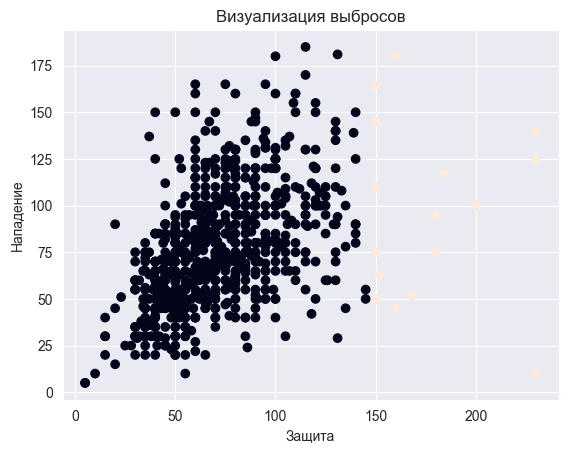

In [76]:
plt.title('Визуализация выбросов')
plt.xlabel('Защита')
plt.ylabel('Нападение')
plt.scatter(df.defense, df.attack, c = col_mask);

In [78]:
# Выбросы по второй колонке
attack_lq = df.attack.quantile(0.25)
attack_uq = df.attack.quantile(0.75)
attack_iqr = attack_uq - attack_lq
attack_lq = attack_lq - 1.5 * attack_iqr
attack_uq = attack_uq - 1.5 * attack_iqr

In [79]:
col_attack = (df.defense <= lower_bound) | (df.defense >= upper_bound)

In [83]:
sum(df.attack <= lower_bound)

0

In [87]:
sum(df.attack >= upper_bound)

24

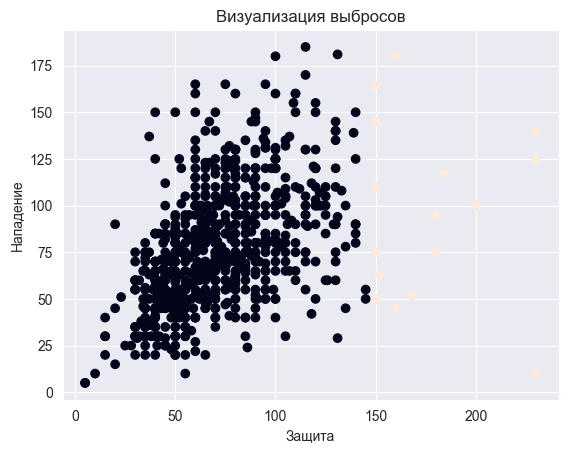

In [91]:
plt.title('Визуализация выбросов')
plt.xlabel('Защита')
plt.ylabel('Нападение')
plt.scatter(df.defense, df.attack, c = np.array(col_mask) + np.array(col_attack));

# Поиск выбросов - библиотека SKlearn

In [97]:
from sklearn.ensemble import IsolationForest

In [99]:
isf = IsolationForest(n_estimators=100, random_state=17)

In [100]:
preds = isf.fit_predict(df[['attack', 'defense']])

In [102]:
isf.decision_function(df[['attack', 'defense']])

array([ 8.12125475e-02,  8.83364943e-02,  2.98385437e-02,  7.17778133e-02,
        8.58993205e-02,  6.97849570e-02,  7.39576895e-02,  7.48798028e-02,
        2.48334409e-02,  3.17761019e-02, -6.37957027e-02,  8.12454804e-02,
        1.53272983e-02, -1.58090325e-02, -1.36325741e-01,  7.58682780e-02,
        9.62818511e-02,  8.35731800e-02,  5.29108070e-02,  1.02567787e-01,
        2.42957289e-02,  9.19200935e-02,  7.93869941e-02,  8.16408553e-02,
        7.02627959e-02,  7.11104338e-02,  7.84603106e-02,  3.40354807e-02,
        7.35522052e-02,  8.81078940e-02,  5.67958543e-02,  6.73170943e-02,
        8.28266482e-02,  6.46520940e-02,  7.78757619e-02,  9.78855619e-02,
        6.26857642e-02,  9.65714375e-02, -5.96953971e-02,  7.61015420e-02,
        6.03979168e-02,  9.90734569e-02,  8.90295075e-02,  1.03923117e-01,
        7.55406830e-02,  9.89815078e-02,  7.68134565e-02,  8.93570546e-02,
        9.63530005e-02,  2.25131952e-02,  6.36057833e-02,  4.19875017e-02,
        9.76983388e-02,  

In [103]:
df['scores'] = isf.decision_function(df[['attack', 'defense']])

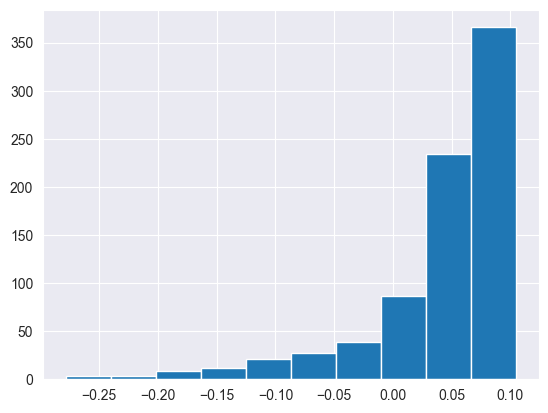

In [104]:
plt.hist(df['scores']);

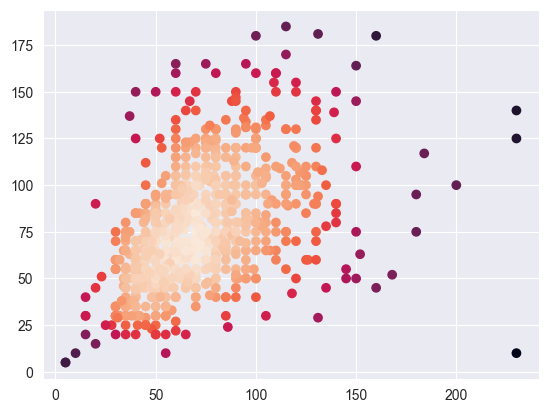

In [108]:
plt.scatter(df.defense, df.attack, c = df.scores);